# Week 09

Implement the bootstrapping algorithm from the lectures:

![](bootstrapping_algo.png)

You have two algorithms, which one is better? Both algorithms try to predict the sum of two dices, one of them randomly the other one using the *maximum likelihood*:

- $\mathcal A_1$: randomly guessing
- $\mathcal A_2$: return the most likely value


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)

N = 1000000
B = 1000

def roll_two_dice():
    return random.randint(1, 6) + random.randint(1, 6)

def generate_dice_tosses(n = N):
    return np.array([roll_two_dice() for _ in range(n)])

def alg_1():
    return roll_two_dice()

def alg_2():
    # 7 is the most common sum of two dices (1+6, 2+5, 3+4, 4+3, 5+2, 6+1)
    return 7

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def delta(y_true, pred_a, pred_b):
    return accuracy(y_true, pred_a) - accuracy(y_true, pred_b)

def bootstrap(y_true, pred_a, pred_b, n_samples):
    deltas = []
    delta_obs = delta(y_true, pred_a, pred_b)

    for i in range(n_samples):
        idx = np.random.choice(N, N, replace=True)
        y_sample = y_true[idx]
        pred_a_sample = pred_a[idx]
        pred_b_sample = pred_b[idx]
        deltas.append(delta(y_sample, pred_a_sample, pred_b_sample))

    return deltas, delta_obs

def displayBootstrap(deltas, delta_obs):
    plt.figure(figsize=(10, 6))
    plt.hist(deltas, bins=30, alpha=0.7, edgecolor='black')
    plt.axvline(delta_obs, color='red', linestyle='dashed', linewidth=2, label=f'Observed Δ = {delta_obs:.4f}')
    plt.title('Bootstrap Distribution of Δ (Accuracy Difference)')
    plt.xlabel('Δ (Accuracy of alg_2 - alg_1)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


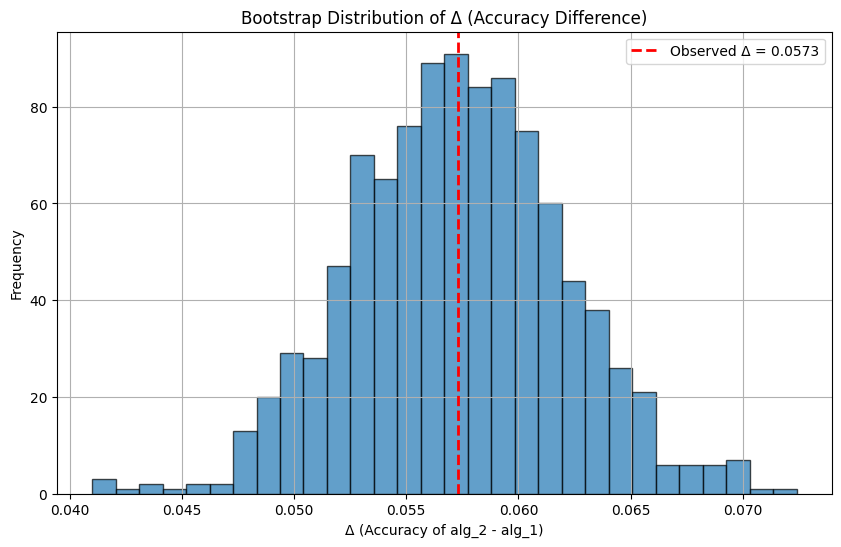

In [9]:
true_values = generate_dice_tosses(N)
pred_a = np.array([alg_1() for _ in range(N)])
pred_b = np.array([alg_2() for _ in range(N)])

deltas, delta_obs = bootstrap(true_values, pred_b, pred_a, B)
displayBootstrap(deltas, delta_obs)

To do:

- Either derive the most likely value by hand or simulate and count.
- Implement the bootstrapping algorithm and compare the two algorithms.